Connected to cmri (Python 3.9.0)

In [ ]:
# This import is necessary to run the code cell-by-cell
from lab05_solution import *

In [ ]:
op = Lab05_op()
kdata, sens_maps, noise_maps = op.load_data()

In [ ]:
# Reconstruction
coil_imgs = utils.ifft2c(kdata, axes=(0, 1))
# complex sum
complex_sum = utils.cmplx_sum(coil_imgs)

# Sum of squares
sos = op.sos_comb(coil_imgs)

# Least-squares w/o pre-whitening
ls = op.ls_comb(coil_imgs, sens_maps)

# Least-squres w/ pre-whitening
PSI = op.get_psi(noise_maps)
ls_wPSI = op.ls_comb(coil_imgs, sens_maps, PSI)

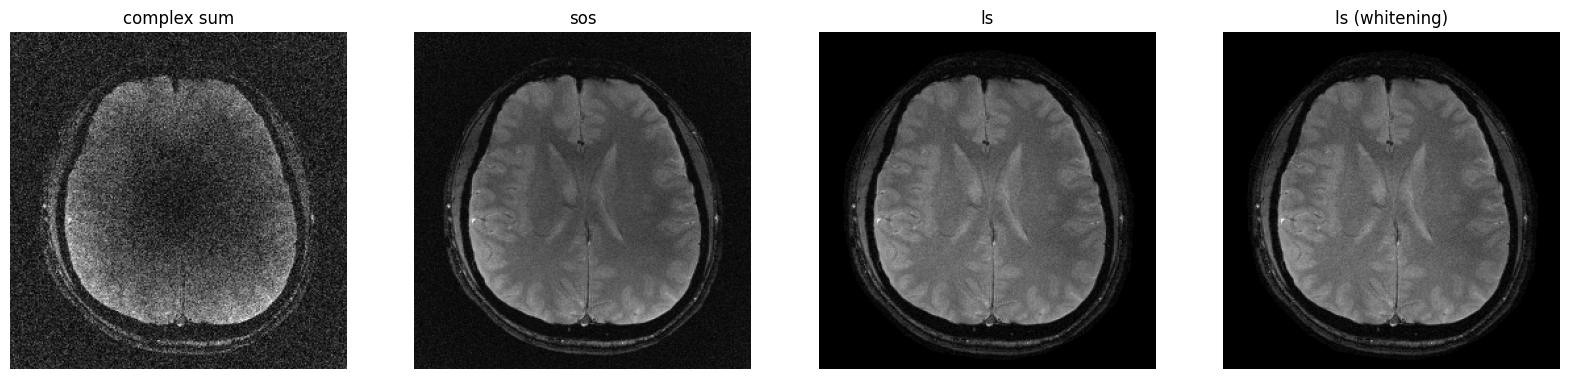

In [ ]:
utils.imshow(
    [complex_sum, sos, ls, ls_wPSI],
    titles=["complex sum", "sos", "ls", "ls (whitening)"],
)

Check non-zero idx from sm

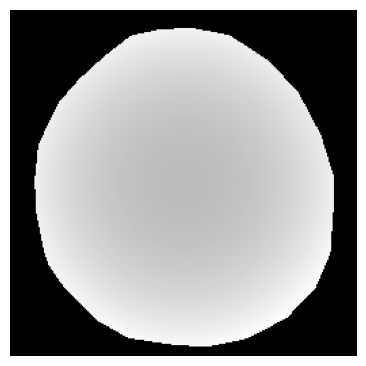

In [ ]:
sm_comb = np.sum(np.abs(sens_maps), -1)
utils.imshow([sm_comb])

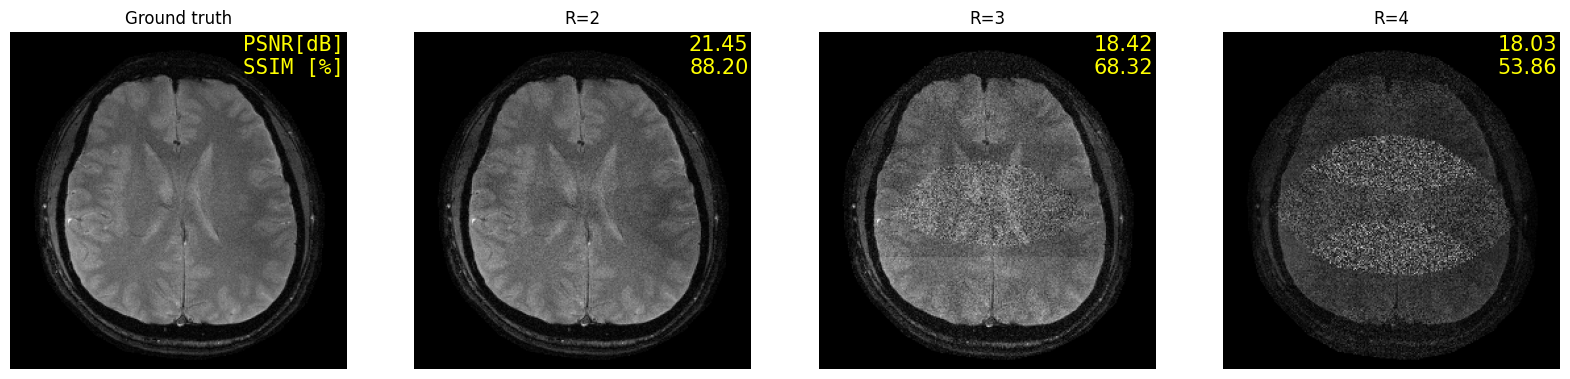

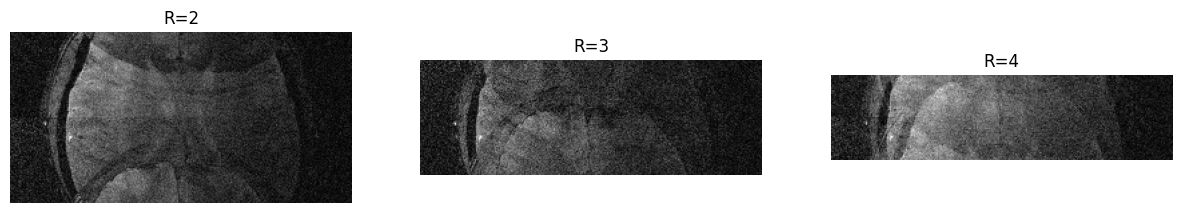

In [ ]:
senses = []
recon_us = []
title_R, title_g = [], []
gs = []
for R in [2, 3, 4]:
    aliased_img = utils.ifft2c(kdata[::R], axes=(0, 1))
    unaliased_img, g_maps = op.sense_recon(aliased_img, sens_maps, PSI, R)
    senses.append(unaliased_img)
    recon_us.append(aliased_img[..., 3])
    gs.append(g_maps)
    title_R.append(f"R={R}")
    title_g.append(f"g-factor={np.mean(g_maps[np.nonzero(g_maps)]): .2f}")
utils.imshow(senses, gt=ls_wPSI, titles=title_R)
utils.imshow(recon_us, titles=title_R)

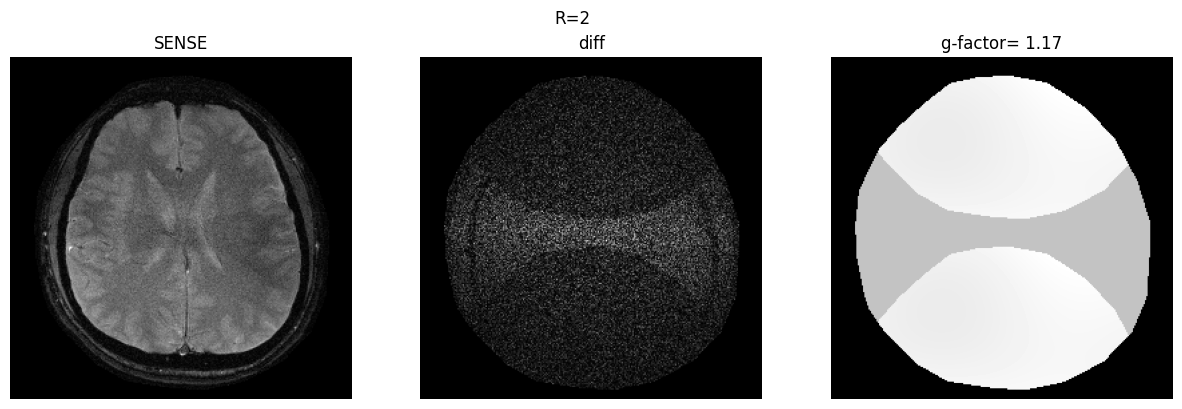

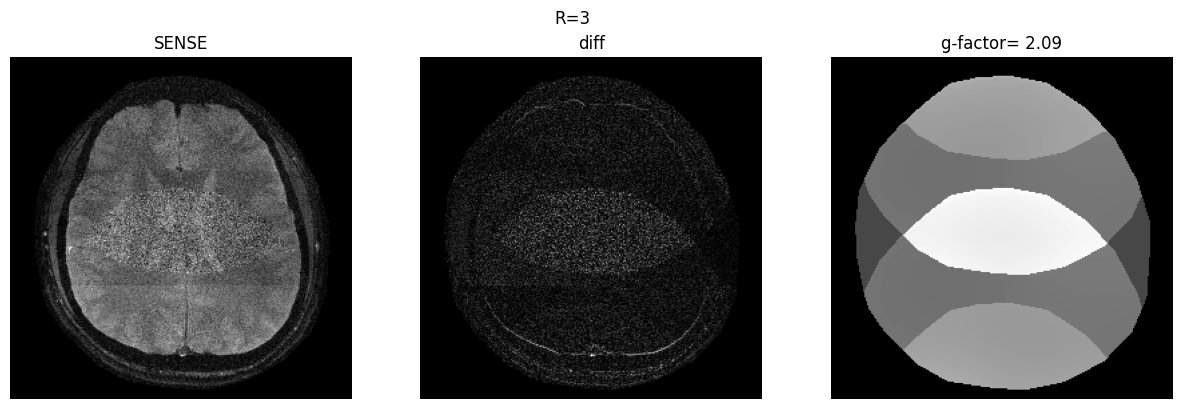

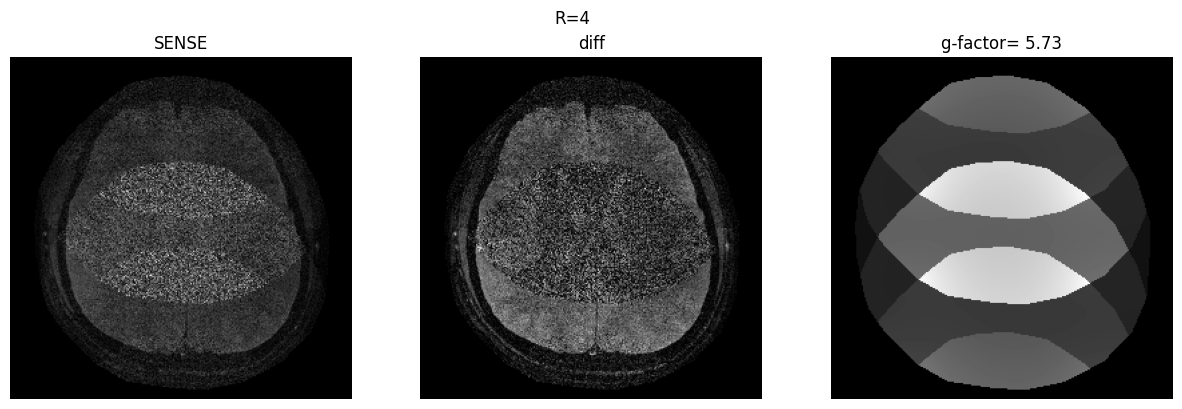

In [ ]:
senses_norm = [utils.normalization(i) for i in senses]
ls_wPSI_norm = utils.normalization(ls_wPSI)
senses_diff = [ls_wPSI_norm - i for i in senses_norm]

for i in range(len(senses_norm)):
    utils.imshow(
        [senses_norm[i], senses_diff[i], gs[i]],
        titles=["SENSE", "diff", title_g[i]],
        suptitle=title_R[i],
    )

# Figures from the exercise

![draw](figs/ex5_draw.png)

![unwarp](figs/sense_unwrap.jpg)

![conv](figs/conv.jpg)